##**TASK:1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
print("DATA FROM THE URL")
df=pd.read_csv(url)   #read csv file from the url
df.head() #prints first 5 rows of the data recorded

DATA FROM THE URL


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail() #prints last 5 rows of the data recorded

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Lets see overall length of the data set and no.of.rows and columns present in the data

In [4]:
print("total length of dataframe:",len(df)) #prints length of the dataframe
print("shape of the dataframe:",df.shape)

total length of dataframe: 25
shape of the dataframe: (25, 2)


###**DATA-PREPROCESSING**


Lets check for the null values if present any

In [5]:
df.isnull()      #checks total no of null values present in each columns

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.duplicated()  #prints True if any duplicate values presented Else False

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [8]:
df.dtypes             #checking the data types of hours and scores

Hours     float64
Scores      int64
dtype: object

In [10]:
print(df.info())
print("***************************************************************************")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
***************************************************************************
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


###**DATA-VISUALIZATION**

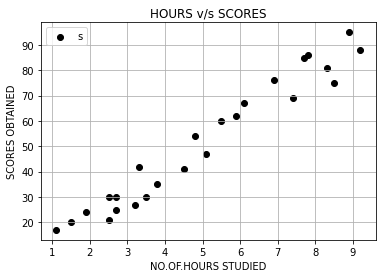

In [11]:
x=df.Hours
y=df.Scores
plt.scatter(x,y,color="black")
plt.xlabel("NO.OF.HOURS STUDIED")
plt.ylabel("SCORES OBTAINED")
plt.title("HOURS v/s SCORES")
plt.grid()
plt.legend("scores",loc='upper left')

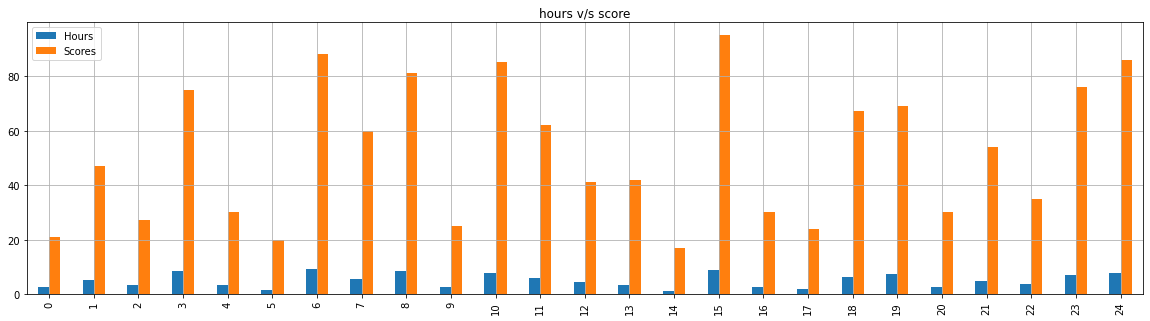

In [12]:
df.plot(kind='bar',figsize=(20,5))
plt.title("hours v/s score")
plt.grid()
plt.show()

In [13]:
cmatrix=df.corr()       #finding how together hours and scores are related to each other
print(cmatrix)          #prints the coorelation matrix

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


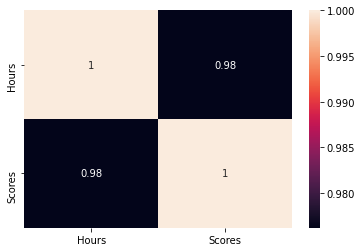

In [14]:
sns.heatmap(cmatrix,annot=True)
plt.show()


From the above results we can see that there is a positive linear correlation between the no.of hours studied and scores obtained

###**Dividing data into test train sets**

In [15]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [16]:
X=df[['Hours']].values            #since hours are independent we choose that to be x
y=df['Scores'].values           #since scores are dependent on hours we choose that to be y
print("X :",X)
print("***************************************************")
print("y :",y)

X : [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
***************************************************
y : [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [18]:
print("X_train :",X_train)
print('***************************************')
print("X_test :",X_test)

X_train : [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
***************************************
X_test : [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
print("y_train :",y_train)
print("y_test :",y_test)

y_train : [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
y_test : [20 27 69 30 62]


Since there is a Linear relation between hours and score we will train the model using Linear Regression Algorithm 

In [20]:
from sklearn.linear_model import LinearRegression 
Lin_reg=LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print("X_train :",X_train)

X_train : [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [22]:
print("y_train :",y_train)

y_train : [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


Ploting the Regression Line

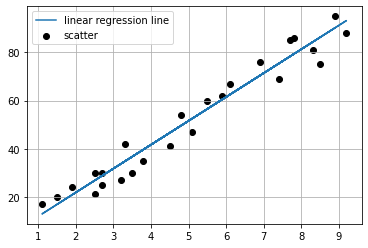

In [23]:
line =Lin_reg.coef_*X+Lin_reg.intercept_
plt.scatter(x,y,color="black",label="scatter")
plt.plot(x,line,label="linear regression line")
plt.grid()
plt.legend()
plt.show()


In [24]:
print("Training score: ",Lin_reg.score(X_train,y_train))
print("Testing score: ",Lin_reg.score(X_test,y_test))

Training score:  0.9515510725211553
Testing score:  0.9454906892105354


In [25]:
y_pred=Lin_reg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


**comparision between actual and Predicted values**

In [26]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})  
df1.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


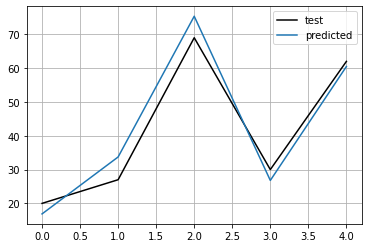

In [27]:
plt.plot(y_test,color="black",label="test")
plt.plot(y_pred,label="predicted")
plt.grid()
plt.legend()
plt.show()

In [28]:
print("intercept",Lin_reg.intercept_)
print("coefficients",Lin_reg.coef_)

intercept 2.018160041434662
coefficients [9.91065648]


###**Predicting the score if a student studies for 9.25 hours**

In [30]:
hours = float(input())
p = Lin_reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(p[0]))

9.25
No of Hours = 9.25
Predicted Score = 93.69173248737539


**Improving the model**

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
ypred=rfr.predict(X_test)
print(ypred)

[19.35833333 38.635      84.43       23.3275     64.74      ]


In [32]:
df2=pd.DataFrame({"Actual":y_test,"predicted":ypred})
df2.head()

,Actual,predicted
0,20,19.358333
1,27,38.635000
2,69,84.430000
3,30,23.327500
4,62,64.740000


##**Evaluation of the model**

In [33]:
print("Mean absolute Error of Linear Regression:",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared errror of Linear Regression:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square error of Linear Regression:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Mean absolute Error of RandomForest Regression:",metrics.mean_absolute_error(y_test, ypred))
print("Mean Squared errror of RandomForest Regression:",metrics.mean_squared_error(y_test,ypred))
print("Root Mean Square error of RandomForest Regression:",np.sqrt(metrics.mean_squared_error(y_test,ypred)))

Mean absolute Error of Linear Regression: 4.183859899002982
Mean Squared errror of Linear Regression: 21.598769307217456
Root Mean Square error of Linear Regression: 4.647447612100373
Mean absolute Error of RandomForest Regression: 7.423833333333333
Mean Squared errror of RandomForest Regression: 85.17994347222225
Root Mean Square error of RandomForest Regression: 9.229298102901556


In [34]:
df3=pd.DataFrame({'model':["linear regression","random forest"],'mean absolute':['4.183859899002982','7.056166666666667'],'mean squared':['21.598769307217456','79.93261513888892'],'rootmeanSquare':['4.647447612100373','8.940504188181388']})
df3.head()

,model,mean absolute,mean squared,rootmeanSquare
0,linear regression,4.183859899002982,21.598769307217456,4.647447612100373
1,random forest,7.056166666666667,79.93261513888892,8.940504188181388


In [35]:
print("r^2 score:",metrics.r2_score(y_test,y_pred))

r^2 score: 0.9454906892105354


#**CONCLUSIONS:**


1.   on comparing the model Linear regression performs well with less error and more accurate comparatively
2.   hence forth, the Predicted score if a student studies for 9.25 hrs/day is 93.69173248737539

